In [1]:
# working dir
import os
import sys

cwd = os.getcwd()
root_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(root_dir)

print(root_dir)

c:\Users\david\Desktop\Main\03_Uni\WWI21DSA\02_Vorlesungen\06_Projektrealisierung\Projektrealisierung


In [2]:
# Imports and settings
import pandas as pd
import random

random.seed(42)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [3]:
import pandas as pd
from IPython.display import display, HTML

# Display Dataframe (with scrollbars)
def ddf(df, max_height=500, max_width=1500):
    """
    Display a pandas DataFrame with horizontal and vertical scrollbars in a Jupyter notebook.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to display.
    max_height (int): The maximum height of the scrollable area in pixels.
    max_width (int): The maximum width of the scrollable area in pixels.
    """
    style = f"""
    <style>
    .scrollable-dataframe {{
        max-height: {max_height}px;
        max-width: {max_width}px;
        overflow: auto;
        display: inline-block;
        position: relative;
    }}
    .scrollable-dataframe thead th {{
        position: sticky;
        top: 0;
        background-color: white;
        z-index: 1;
    }}
    </style>
    """
    html = style + df.to_html(classes='scrollable-dataframe')
    display(HTML(html))


In [4]:
def split_creation_time(df):
    df["creation_datetime"] = df["creation_time"]
    df["creation_time"] = pd.to_datetime(df["creation_time"])
    df["creation_date"] = df["creation_time"].dt.date
    df["creation_time"] = df["creation_time"].dt.time
    start_cols = ["id", "creation_date", "creation_time"]
    df = df[start_cols + [col for col in df.columns if col not in start_cols]]
    return df

In [64]:
import xml.etree.ElementTree as ET
import pprint

def get_checkin_info(xml_content):

    def parse_element(element):
        parsed_data = {}
        if element.text is not None and element.text.strip():
            parsed_data[element.tag] = element.text.strip()
        for child in element:
            child_data = parse_element(child)
            if child.tag in parsed_data:
                if isinstance(parsed_data[child.tag], list):
                    parsed_data[child.tag].append(child_data[child.tag])
                else:
                    parsed_data[child.tag] = [parsed_data[child.tag], child_data[child.tag]]
            else:
                parsed_data.update(child_data)

        return {element.tag: parsed_data}


    root = ET.fromstring(xml_content)
    result_dict = parse_element(root)
    try:
        males = result_dict[r"{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures"]["PaxTotals"]["PaxByGender"]["GenderBreakdown"][0]["numberOfPax"]["numberOfPax"]
        females = result_dict[r"{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures"]["PaxTotals"]["PaxByGender"]["GenderBreakdown"][1]["numberOfPax"]["numberOfPax"]
        childs = result_dict[r"{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures"]["PaxTotals"]["PaxByGender"]["GenderBreakdown"][2]["numberOfPax"]["numberOfPax"]
        infants = result_dict[r"{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures"]["PaxTotals"]["PaxByGender"]["GenderBreakdown"][3]["numberOfPax"]["numberOfPax"]
        baggage_count = result_dict[r"{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures"]["BagTotals"]["totalPieces"]["totalPieces"]
        baggage_weight = result_dict[r"{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures"]["BagTotals"]["TotalWeight"]["weight"]["weight"]

        males, females, childs, infants, baggage_count, baggage_weight = int(males), int(females), int(childs), int(infants), int(baggage_count), float(baggage_weight)
    except Exception as e:
        # show error message
        print("Fehler beim parsen von xml")
        print(e.args)
        pprint.pprint(result_dict)
        return None, None, None


    return (males, females, childs, infants), baggage_count, baggage_weight


In [61]:
import xml.etree.ElementTree as ET

# XML content
xml_content = '''<?xml version="1.0" encoding="UTF-8"?>
<n:PassengerCheckInFigures xmlns:n="http://www.lsb.de/iocc/PassengerCheckIn"
 xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
 <loadsystemHeader>
 <airline>AB</airline>
 <flightNumber>2373</flightNumber>
 <departureStation>IXB</departureStation>
 <flightDateLocal>2024-04-30</flightDateLocal>
 </loadsystemHeader>
 <Action>
 <originator>C</originator>
 <type>O</type>
 </Action>
 <Equipment>
 <configuration>Y189</configuration>
 </Equipment>
 <PaxTotals>
 <destination>BLR</destination>
 <paxNumber>163</paxNumber>
 <PaxByClass>
 <ClassBreakdown>
 <code>Y</code>
 <numberOfPax>163</numberOfPax>
 </ClassBreakdown>
 </PaxByClass>
 <PaxByGender>
 <GenderBreakdown>
 <gender>M</gender>
 <numberOfPax>103</numberOfPax>
 </GenderBreakdown>
 <GenderBreakdown>
 <gender>F</gender>
 <numberOfPax>53</numberOfPax>
 </GenderBreakdown>
 <GenderBreakdown>
 <gender>C</gender>
 <numberOfPax>7</numberOfPax>
 </GenderBreakdown>
 <GenderBreakdown>
 <gender>I</gender>
 <numberOfPax>0</numberOfPax>
 </GenderBreakdown>
 </PaxByGender>
 </PaxTotals>
 <BagTotals>
 <destination>BLR</destination>
 <totalPieces>98</totalPieces>
 <TotalWeight>
 <weight>1126</weight>
 <weightUnit>KG</weightUnit>
 </TotalWeight>
 </BagTotals>
 <PaxDistribution>
 <PaxPerZone>
 <name>0A</name>
 <male>16</male>
 <female>9</female>
 <child>2</child>
 <infant>0</infant>
 </PaxPerZone>
 <PaxPerZone>
 <name>0B</name>
 <male>19</male>
 <female>7</female>
 <child>3</child>
 <infant>0</infant>
 </PaxPerZone>
 <PaxPerZone>
 <name>0C</name>
 <male>16</male>
 <female>9</female>
 <child>0</child>
 <infant>0</infant>
 </PaxPerZone>
 <PaxPerZone>
 <name>0D</name>
 <male>16</male>
 <female>11</female>
 <child>0</child>
 <infant>0</infant>
 </PaxPerZone>
 <PaxPerZone>
 <name>0E</name>
 <male>18</male>
 <female>7</female>
 <child>0</child>
 <infant>0</infant>
 </PaxPerZone>
 <PaxPerZone>
 <name>0F</name>
 <male>18</male>
 <female>10</female>
 <child>2</child>
 <infant>0</infant>
 </PaxPerZone>
 </PaxDistribution>
</n:PassengerCheckInFigures>'''

# Function to recursively parse the XML tree and create a dictionary
def parse_element(element):
    parsed_data = {}
    if element.text is not None and element.text.strip():
        parsed_data[element.tag] = element.text.strip()
    for child in element:
        child_data = parse_element(child)
        if child.tag in parsed_data:
            if isinstance(parsed_data[child.tag], list):
                parsed_data[child.tag].append(child_data[child.tag])
            else:
                parsed_data[child.tag] = [parsed_data[child.tag], child_data[child.tag]]
        else:
            parsed_data.update(child_data)
    return {element.tag: parsed_data}

# Parse the XML content
root = ET.fromstring(xml_content)

# Parse the root element and convert it into a dictionary
result_dict = parse_element(root)

# Print the result
import pprint
pprint.pprint(result_dict)


{'{http://www.lsb.de/iocc/PassengerCheckIn}PassengerCheckInFigures': {'Action': {'originator': {'originator': 'C'},
                                                                                 'type': {'type': 'O'}},
                                                                      'BagTotals': {'TotalWeight': {'weight': {'weight': '1126'},
                                                                                                    'weightUnit': {'weightUnit': 'KG'}},
                                                                                    'destination': {'destination': 'BLR'},
                                                                                    'totalPieces': {'totalPieces': '98'}},
                                                                      'Equipment': {'configuration': {'configuration': 'Y189'}},
                                                                      'PaxDistribution': {'PaxPerZone': [{'child': {'child': '2'},
      

-------------

In [51]:
abcd = pd.read_csv("../../src/data/ABCD_tripfiles_preprocessed.csv")
abcd_cwata = pd.read_csv("../../src/data/extracted/abcd_CalculateWeightAndTrimAction.csv")

C:\Users\david\AppData\Local\Temp\ipykernel_21968\919091174.py:1: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  abcd = pd.read_csv("../../src/data/ABCD_tripfiles_preprocessed.csv")


In [52]:
flight_id = "AB_2373_30_IXB"

df1 = abcd[abcd["flight_id"] == flight_id]
df2 = abcd_cwata.loc[abcd_cwata["flight_id"] == flight_id, ["id", "PAX_WI_weight", "TOTAL_LOAD_WI"]]

df = df1.merge(df2, on="id", how="left")


In [53]:
df["creation_time"] = pd.to_datetime(df["creation_time"])
df = df.sort_values(["creation_time", "id"], ascending=True)

cols = ["flight_id", "id", "header_id", "creation_time", "action_name", "header_category", "PAX_WI_weight", "TOTAL_LOAD_WI"]
ddf(df[cols])

,flight_id,id,header_id,creation_time,action_name,header_category,PAX_WI_weight,TOTAL_LOAD_WI
242,AB_2373_30_IXB,33766922,82d2c409b5dec333,2024-04-30 04:01:00,CheckinMsgProcessor,received,NaN,NaN
496,AB_2373_30_IXB,33766923,82d2c409b5dec333,2024-04-30 04:01:00,StorePaxDataAction,received,NaN,NaN
231,AB_2373_30_IXB,33766924,82d2c409b5dec333,2024-04-30 04:01:00,CalculateWeightAndTrimAction,received,NaN,NaN
230,AB_2373_30_IXB,33766925,82d2c409b5dec333,2024-04-30 04:01:00,CalculateWeightAndTrimAction,saved,13935.0,1731.0
497,AB_2373_30_IXB,33766926,82d2c409b5dec333,2024-04-30 04:01:00,StorePaxDataAction,saved,NaN,NaN
243,AB_2373_30_IXB,33766927,82d2c409b5dec333,2024-04-30 04:01:00,CheckinMsgProcessor,saved,NaN,NaN
244,AB_2373_30_IXB,33766608,9bc78dbecfb75a73,2024-04-30 04:03:01,CheckinMsgProcessor,received,NaN,NaN
498,AB_2373_30_IXB,33766609,9bc78dbecfb75a73,2024-04-30 04:03:01,StorePaxDataAction,received,NaN,NaN
229,AB_2373_30_IXB,33766610,9bc78dbecfb75a73,2024-04-30 04:03:01,CalculateWeightAndTrimAction,received,NaN,NaN
228,AB_2373_30_IXB,33766611,9bc78dbecfb75a73,2024-04-30 04:03:01,CalculateWeightAndTrimAction,saved,13935.0,1728.0


In [54]:
# temp = df.groupby("header_id")["creation_time"].nunique().reset_index()
# print(temp[temp["creation_time"] == 2])
# df[df["header_id"] == "f505410de1033fb2"][cols]

In [65]:
df_grouped = df.groupby("header_id")

pax_data = []
baggage_data = []
for _, group in df_grouped:
    datetime = group["creation_time"].iloc[0]

    cmp_pax_counts = None
    cmp_baggage_count = None
    cmp_baggage_weight = None
    cmp = group.loc[
        (group["action_name"] == "CheckinMsgProcessor") &
        (group["header_category"] == "received"),
        "entry_details"
    ]
    if len(cmp) != 0:
        cmp_pax_counts, cmp_baggage_count, cmp_baggage_weight = get_checkin_info(cmp.iloc[0])

    cwata = group.loc[
        (group["action_name"] == "CalculateWeightAndTrimAction") & 
        (group["header_category"] == "saved")
    ]
    cwata_pax_weight = None
    cwata_total_load = None
    if len(cwata) != 0:
        cwata_pax_weight = int(cwata["PAX_WI_weight"].iloc[0])
        cwata_total_load = int(cwata["TOTAL_LOAD_WI"].iloc[0])

    
    pax_data.append((datetime, cmp_pax_counts, cwata_pax_weight))
    baggage_data.append((datetime, cmp_baggage_count, cwata_total_load))

pax_data = sorted(pax_data, key=lambda x: x[0])
baggage_data = sorted(baggage_data, key=lambda x: x[0])

In [129]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def create_plot(data):
    # Parse the data into appropriate lists
    dates = [item[0] for item in data]
    cwata_weights = [item[2] for item in data]
    cmp_counts = [sum(item[1]) if item[1] is not None else None for item in data]
    
    # Create the plot
    fig, ax1 = plt.subplots(figsize=(18, 9))


    ax1.plot(dates, cmp_counts, label='Counts', color='blue', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Checked In Passenger Count (cmp)', color='blue')
    ax1.grid(True, color='blue', linewidth=0.1)

    # Create a second y-axis for the line chart
    ax2 = ax1.twinx()
    ax2.plot(dates, cwata_weights, label='Weights', color='red', marker='o')
    ax2.set_ylabel('Passenger Weight (cwata)', color='red')
    ax2.grid(True, color='red', linewidth=0.1)

    # Improve the x-axis date formatting
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    fig.autofmt_xdate()
    plt.grid(True)
    plt.title('Checked In Passenger Count and Passenger Weight Over Time for flight AB_2373_30_IXB')
    plt.show()

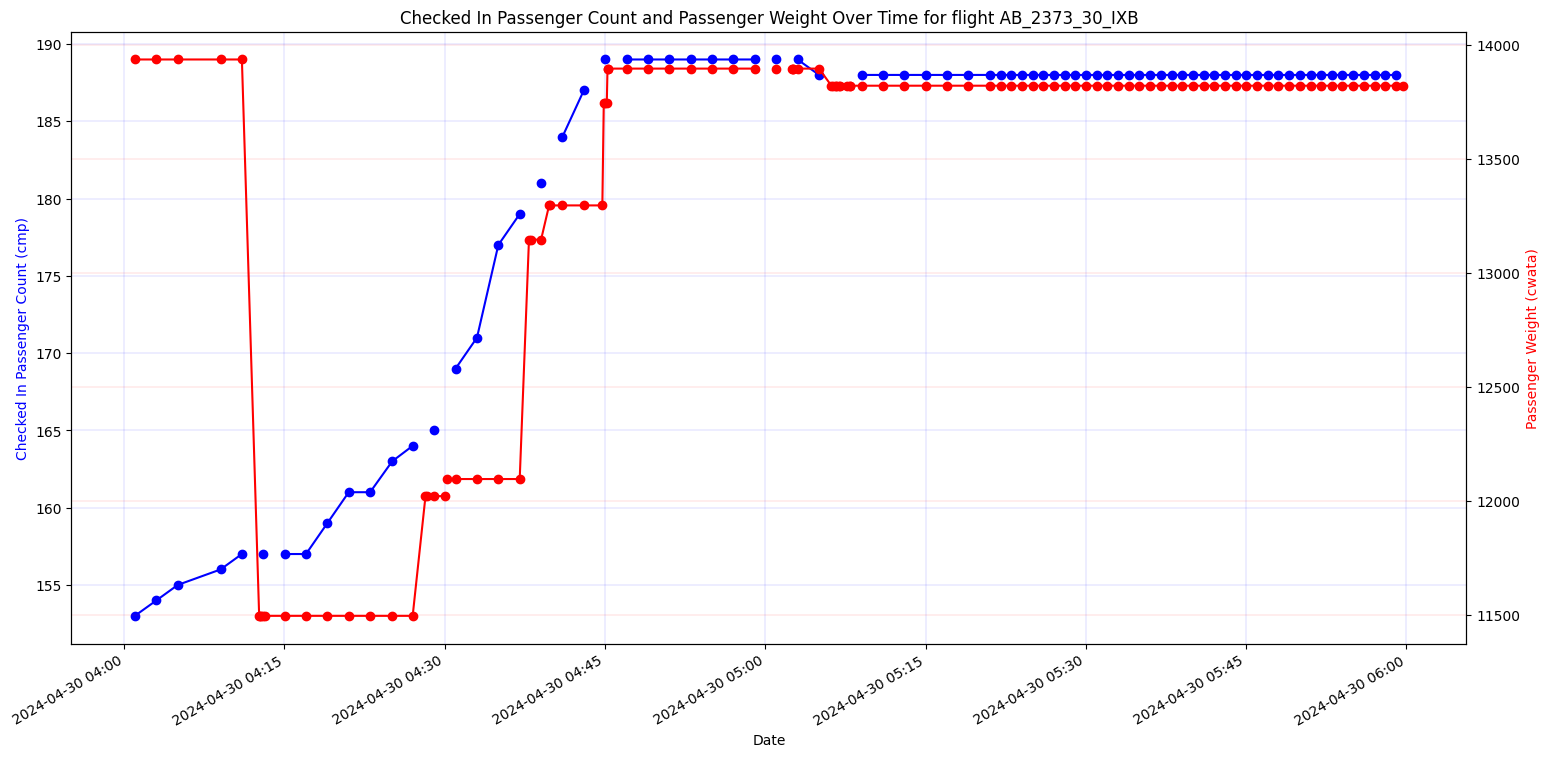

In [130]:
create_plot(pax_data)